In [1]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
df <- read_excel("data-Q1 (Puromycin).xlsx")
head(df)

x,y
0.02,47
0.02,76
0.06,97
0.06,107
0.11,123
0.11,139


In [3]:
x <- df$x
y <- df$y

In [4]:
F <- function(x,theta1,theta2){
    theta1*x/(x+theta2)
}
Z1 <- function(x,theta2){
    x/(theta2+x)
}
Z2 <- function(x,theta1,theta2){
    -theta1*x/(theta2+x)^2
}
S_itha <- function(f,y){
    sum((y-f)^2)
}

In [5]:
# Given
theta1 <- 205
theta2 <- 0.08

In [6]:
f0 <- F(x,theta1,theta2)
s <- S_itha(f0,y)
iter = 10
thres = 10^-6
cost_func <- list()
for (i in 1:iter){
    theta1_iter <- theta1
    theta2_iter <- theta2
    f_iter <- f0
    s_iter <- s
    z1 <- Z1(x,theta2_iter)
    z2 <- Z2(x,theta1_iter,theta2_iter)
    Z <- matrix(c(z1,z2), ncol=2)
    beta_hat_0 <- solve(t(Z)%*%Z)%*%(t(Z))%*%(matrix(y-f_iter))
    theta1 <- beta_hat_0[1,] + theta1_iter
    theta2 <- beta_hat_0[2,] + theta2_iter
    f0 <- F(x,theta1,theta2)
    s <- S_itha(f0,y)
    cost_func[i] <- (s_iter-s)
    dif1 <- (theta1-theta1_iter)/theta1_iter
    dif2 <- (theta2-theta2_iter)/theta2_iter
    if(dif1<thres & dif2<thres)
        break
}

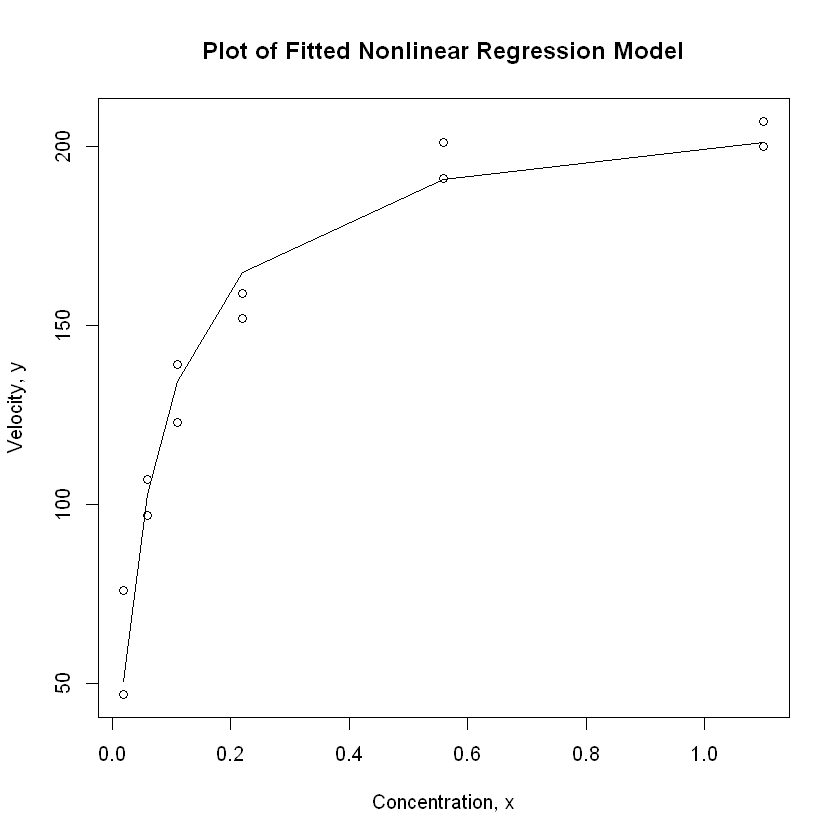

In [7]:
# Figure 12.4
plot(x,y, xlab="Concentration, x", ylab="Velocity, y",main="Plot of Fitted Nonlinear Regression Model")
lines(x,f0)

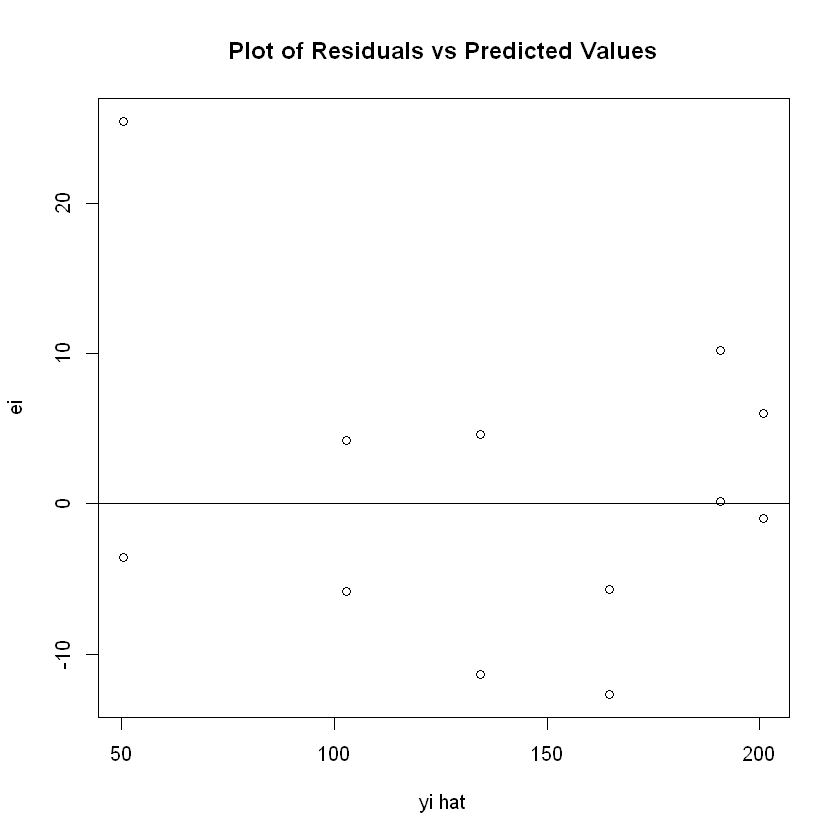

In [8]:
# Figure 12.5
plot(f0, y-f0, xlab="yi hat", ylab="ei", main="Plot of Residuals vs Predicted Values")
abline(0,0)

In [9]:
cost_func
# It can be seen that the cost function is always decreasing

[[1]]
[1] 1949.342

[[2]]
[1] 10.18472

[[3]]
[1] 0.02804448

[[4]]
[1] 0.000262869

[[5]]
[1] 2.443942e-06

[[6]]
[1] 2.269212e-08

[[7]]
[1] 2.103206e-10

In [10]:
# Try another theta
theta1 = 700
theta2 = 100

In [11]:
# Run the same function
f0 <- F(x,theta1,theta2)
s <- S_itha(f0,y)
iter = 10
thres = 10^-6
cost_func <- list()
for (i in 1:iter){
    theta1_iter <- theta1
    theta2_iter <- theta2
    f_iter <- f0
    s_iter <- s
    z1 <- Z1(x,theta2_iter)
    z2 <- Z2(x,theta1_iter,theta2_iter)
    Z <- matrix(c(z1,z2), ncol=2)
    beta_hat_0 <- solve(t(Z)%*%Z)%*%(t(Z))%*%(matrix(y-f_iter))
    theta1 <- beta_hat_0[1,] + theta1_iter
    theta2 <- beta_hat_0[2,] + theta2_iter
    f0 <- F(x,theta1,theta2)
    s <- S_itha(f0,y)
    cost_func[i] <- (s_iter-s)
    dif1 <- (theta1-theta1_iter)/theta1_iter
    dif2 <- (theta2-theta2_iter)/theta2_iter
    if(dif1<thres & dif2<thres)
        break
}

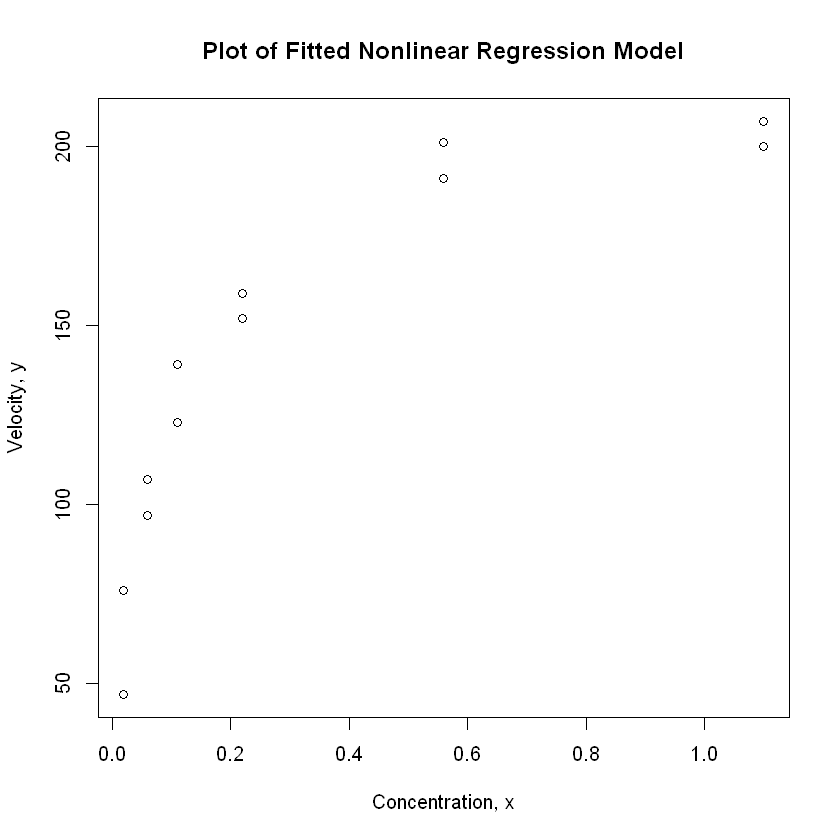

In [12]:
plot(x,y, xlab="Concentration, x", ylab="Velocity, y",main="Plot of Fitted Nonlinear Regression Model")
lines(x,f0)

In [13]:
# There is no line since point (x,f0) is far from the coordinates (x,y) let's try to display f0
f0
# f0 is small enough and the regression line should be far from the (x,y) coordinate.

[1] 0.1380039 0.1380039 0.4140116 0.4140116 0.7590213 0.7590213 1.5180429
 [8] 1.5180429 3.8641110 3.8641110 7.5902238 7.5902238

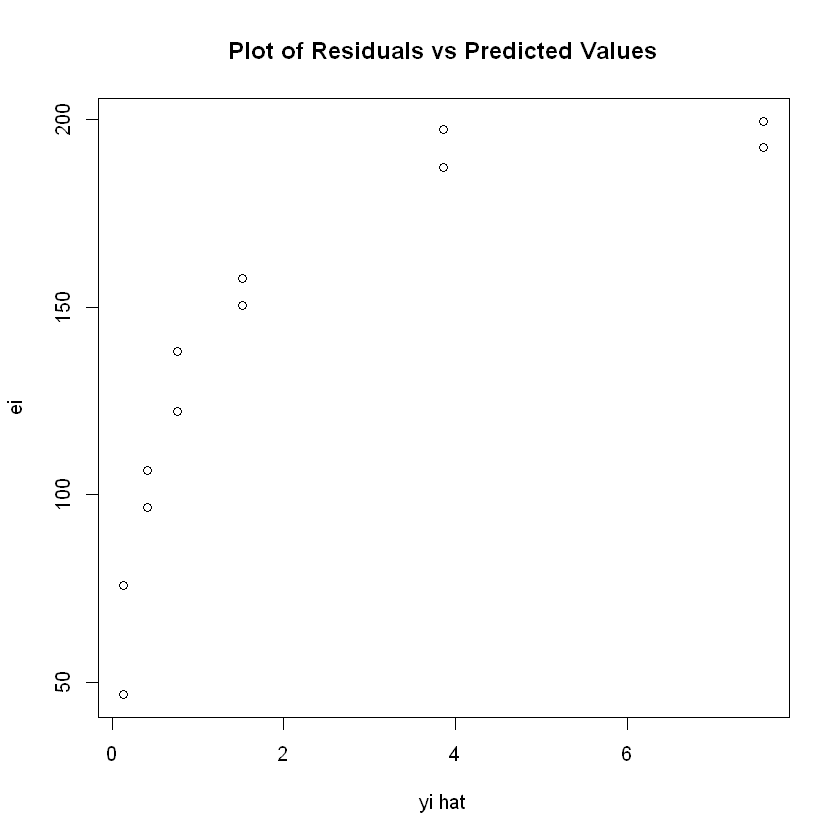

In [14]:
plot(f0, y-f0, xlab="yi hat", ylab="ei", main="Plot of Residuals vs Predicted Values")
abline(0,0)
# Same as the first graph conclusion

In [16]:
# In conclusion, different theta will give different result. By taking theta1 = 700 and theta2 = 100, the nonlinear regression is
# far from the data point. So, it is important to choose the appropriate theta.